processing images and videos for an impressionist effect

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
cmrman = cv2.imread('dataset/cameraman.jpg', 0)

In [3]:
kx, ky = cv2.getDerivKernels(1, 1, 3)
lx, ly = cv2.getDerivKernels(2, 2, 3)

In [4]:
imgkx = cv2.filter2D(cmrman, cv2.CV_32F, kx)
imgky = cv2.filter2D(cmrman, cv2.CV_32F, ky.T)

imglx = cv2.filter2D(cmrman, cv2.CV_32F, lx)
imgly = cv2.filter2D(cmrman, cv2.CV_32F, ly.T)

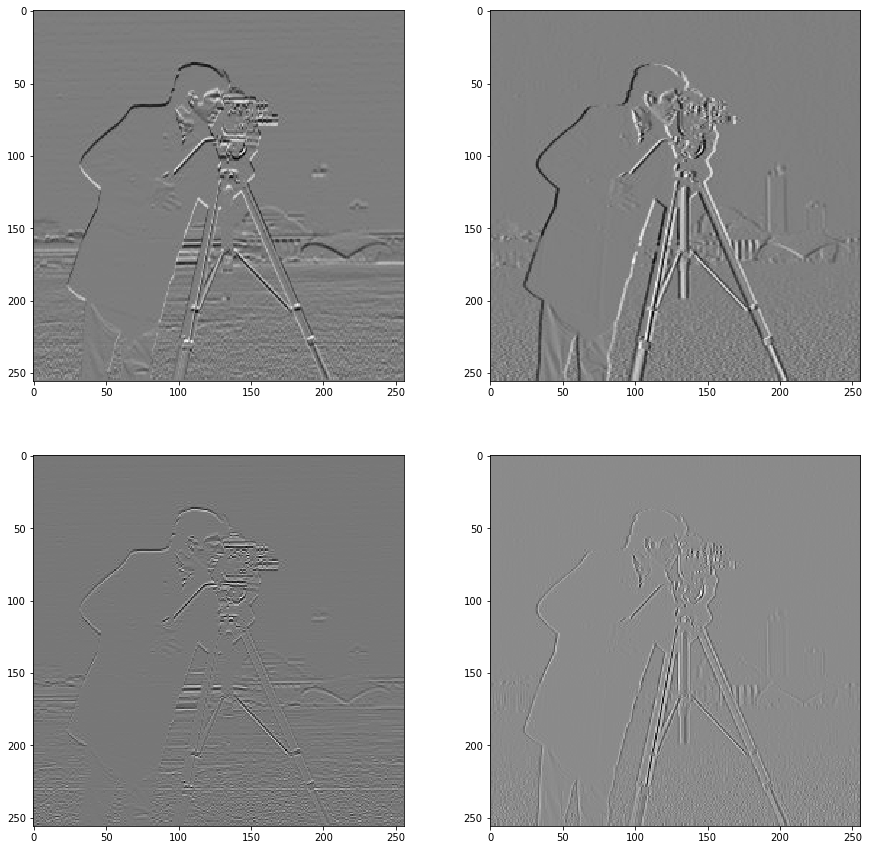

In [39]:
f, axs = plt.subplots(2, 2, figsize = (15, 15))
axs[0][0].imshow(imgkx, cmap='gray')
axs[0][1].imshow(imgky, cmap='gray')
axs[1][0].imshow(imglx, cmap='gray')
axs[1][1].imshow(imgly, cmap='gray')

In [52]:
gradient = np.sqrt(imgkx ** 2 + imgky ** 2)
laplacian = imglx + imgly
dog = np.sqrt(cv2.GaussianBlur(imgkx, (3, 3), 1) ** 2 + cv2.GaussianBlur(imgky, (3, 3), 1) ** 2)
log = cv2.GaussianBlur(laplacian, (3, 3), 1)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


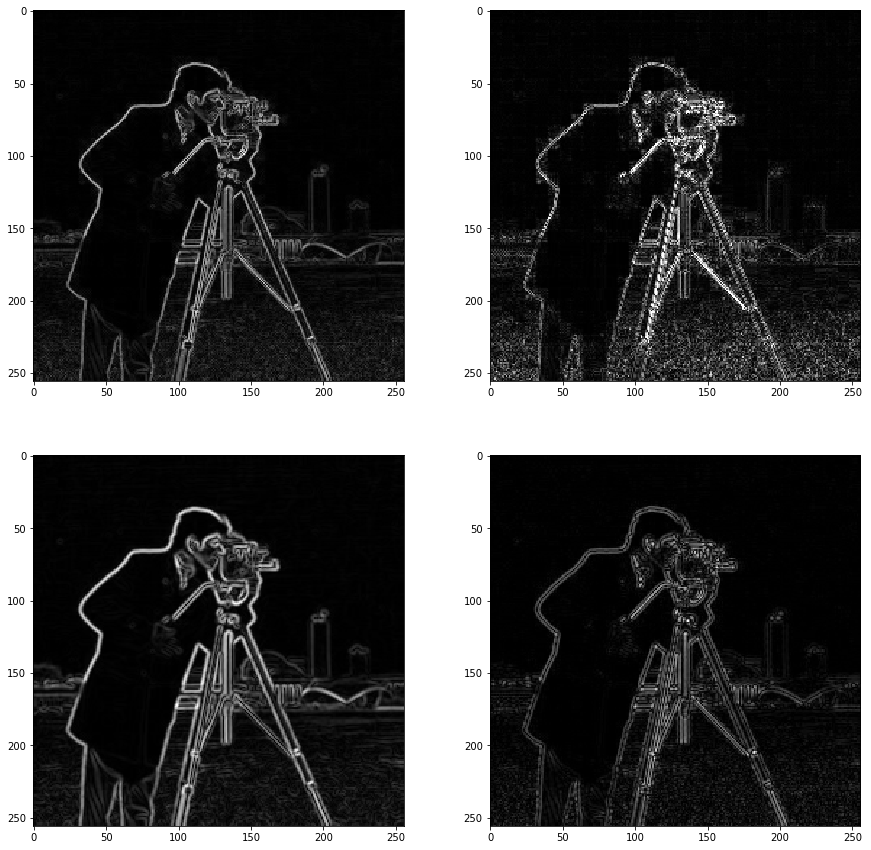

In [53]:
f, axs = plt.subplots(2, 2, figsize = (15, 15))
axs[0][0].imshow(gradient, cmap='gray')
axs[0][1].imshow(cv2.convertScaleAbs(laplacian), cmap='gray')
axs[1][0].imshow(dog, cmap='gray')
axs[1][1].imshow(cv2.convertScaleAbs(log), cmap='gray')

Note that ∇2 I(x,y) is a SCALAR
- ↑ Can be found using a SINGLE mask
- ↓ Orientation information is lost

the extrema in LoG also locates blobs.
- dark blobs on light background means maxima
- light blobs on dark background means minima
- The scale of blob is determined by sigma

LoG can be approximated by a Difference of Gaussian at two different scales by
$$\nabla^2 G_\sigma \approx G_{\sigma_1} - G_{\sigma_2} \text{ where } \sigma_1 = \frac{\sigma}{\sqrt{2}} \text{, } \sigma_2 = \sqrt{2}\sigma$$
\# sharp - blur


![EXTREMA](dataset/extrema.jpg)
So the strategy to identify an 1D edge could be:
- Find maxima or minima of $\frac{dI}{dx}$
- Find zero crossings of $\frac{d^2 I}{d x^2}$
- Find maxima and minima of $\frac{d^2 I}{d x^2}$
![ppt](dataset/ppt.jpg)

https://www.cse.unr.edu/~bebis/CS791E/Notes/EdgeDetection.pdf
#### Canny